In [1]:
import numpy as np
import matplotlib.pyplot as plt

 ## Modelo
 
 <figure><img src="../../../images/Kelvin.png\" width=700 />

## Dedução


   A força de saída é a soma das forças exercidas na malha superior ($F_1$) e inferior ($F_2$):

   $F = F_1 + F_2 $ (1)
   
   O deslocamento ($L$) da malha superior é a soma dos desolocamentos do amortecedor ($L_b$) e da mola ($L_s$):
   
   $L = L_b + L_s$ (2)
   
   Dessa forma, a força na malha superior ($F_1$) é dada pelas seguintes relações: 
   
   $F_1 = k_s (L_s - L_{s0})$ (3)
   
   $F_1 = b \frac{dL_b}{dt}$ (4)
     
   
   A derivada da posição na malha superior é dado por:
   
   $\frac{dL}{dt} = \frac{dL_{ks}}{dt} + \frac{dL_b}{dt}$ (5)
   
   Da mesma forma, podemos escrever (3) e (4) da seguinte forma:
   
   $\frac{dL_{ks}}{dt} = \frac{1}{k_s} \frac{dF_1}{dt}$ (6) 
   
   $\frac{dL_b}{dt} = \frac{F_1}{b}$ (7) 
   
   Substituindo (6) e (7) em (5):
   
   $\frac{dL}{dt} =  \frac{1}{k_s} \frac{dF_1}{dt} + \frac{F_1}{b}$ (8) 
   
   
   Isolando $F_1$ em (1) e substituindo (8) temos:
   
   $\frac{dL}{dt} =  \frac{1}{k_s} \frac{dF}{dt} - \frac{1}{k} \frac{dF_2}{dt} + \frac{F}{b} - \frac{F_2}{b}$ (9)
   
   
   A força na malha inferior ($F_2$) e sua derivida são dadas por:
   
   $F_2 = k_p (L - L_{p0})$ (10)
   
   $\frac{F_2}{dt} = k_p \frac{L}{dt}$ (11)
   
   Substituindo (10) e (11) em (9) temos:
   
   $\frac{dL}{dt} = \frac{1}{k_s} \frac{dF}{dt} - \frac{k_p}{k_s} \frac{dL}{dt} + \frac{F}{b} - \frac{k_p (L - L_{p0})}{b}$ (12)
   
   Isolando as derivadas temos:
   
   $\frac{dF}{dt} - (k_s + k_p) \frac{dL}{dt} = -\frac{k_s}{b}F + \frac{k_s K_p}{b} (L - L_{p0})        $ (13)
  
   
   Para criar um espaço de estados, criaremos a variável ($X_1$) que é dada por:
   
   $X_1 = F - (k_s + k_p) L$ (14)
   
   Sendo a matriz de estados:
   
   $\left[ \begin{array}{c}
   X_1 \\
   \frac{dX_1}{dt} \\
   F \\ \end{array} \right] 
   = 
   \left[ \begin{array}{c}
   F - (k_s + k_p) L \\
   -\frac{k_s}{b}F + \frac{k_s K_p}{b} (L - L_{p0})  \\
   X_1 + (k_s + k_p) L \\ \end{array} \right]$ (15)
   
   
   


## Constante de tempo

   Ao substiuir a equação ($F$) de estados uma na outra, podemos chegar em:
   
   $\frac{dX_1}{dt} = -\frac{k_s}{b}X_1 - \frac{k_s}{b}(ks+kp)L + \frac{k_s K_p}{b} (L - L_{p0})$ (16)
   
   Tudo que não está relacionado com $X_1$ se mantém constante, podendo então substituir por $C$ 
   
   $\frac{dX_1}{dt} = -\frac{k_s}{b}X_1 + C$ (17)
   
   Como é possível notar, (17) é uma EDO separável, dessa forma, X1 é dado por:
   
   $X_1 = Ke^{-\frac{k_s}{b}t} $ (18)
   
   Sendo $\frac{b}{k_s}$ a constante de tempo $\tau$.
   
   Conforme podemos observar no gráfico abaixo, a constante de tempo $\tau$ na curva verde é $10 s^{-1}$, de forma que $k_s$ deve ser 10 vezes maior que a constante $b$.
   
   <figure><img src="../../../images/Loock2008.png\" width=700 />

## Resolução

In [2]:
Lp0 = 0.01
L = 0.007

aux = -3.0/(L-Lp0)

ks =  0.75*aux #valor final * mínimo
b = ks*10 #ks * tau
kp = aux - ks

x1 = 0 - (ks+kp)*Lp0

dt = 0.001
t = np.arange(0,350,dt)

f = np.empty_like(t)
f[0] =0

In [3]:
def dx1dt (x1,L,ks,kp,Lp0,i,b):
    return -(ks/b)*f[i-1] + ((ks*kp)/b)*(L-Lp0)

In [4]:
for i in range(1,len(t)):
    x1 = x1 +dt*dx1dt(x1,L,ks,kp,Lp0,i,b)
    f[i] = x1+ (ks+kp)*L
        

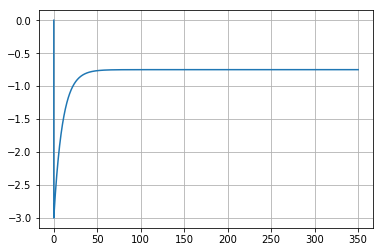

In [5]:
plt.plot(t,f)
plt.grid()
plt.show()